![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [10]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


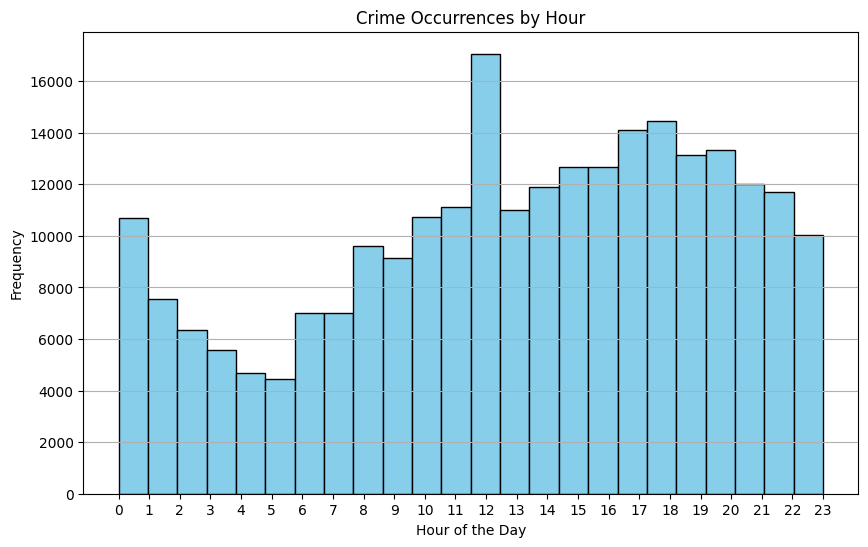

The hour with the highest frequency of crimes is: 12


In [11]:
# Extract the hour from the 'TIME OCC' column and find the peak crime hour
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M', errors='coerce')
crimes['hour'] = crimes['TIME OCC'].dt.hour
peak_crime_hour1 = crimes['hour'].value_counts().idxmax()
peak_crime_hour = int(peak_crime_hour1)

# Plot a histogram showing crime occurrences over time
plt.figure(figsize=(10, 6))
plt.hist(crimes['hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Crime Occurrences by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 24))
plt.grid(axis='y')
plt.show()

# Print the hour with the highest frequency of crimes
print(f"The hour with the highest frequency of crimes is: {peak_crime_hour1}")

In [12]:
crimes['hour'] = crimes['TIME OCC'].dt.hour
crimes['night_crime'] = ((crimes['hour'] >= 22) | (crimes['hour'] <= 3))


# Filter for night crimes and find the area with the largest frequency
night_crimes = crimes[crimes['night_crime']]
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()

# Print the area with the largest frequency of night crimes
print(f"The area with the largest frequency of night crimes is: {peak_night_crime_location}")

The area with the largest frequency of night crimes is: Central


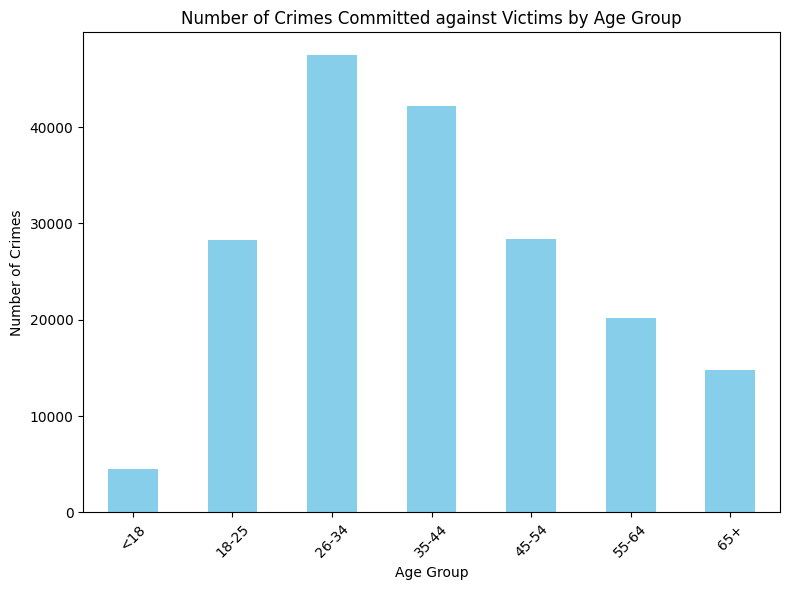

Number of crimes committed against victims by age group:
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
<18       4528
Name: Victim Age Group, dtype: int64


In [13]:
# Assuming the column 'Victim Age' contains the age of the victims, categorize them into age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]  # Define the age group bins
age_labels = ['<18', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']  # Labels for age groups

# Categorize victim ages into age groups
crimes['Victim Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

# Count the number of crimes per age group
victim_ages = crimes['Victim Age Group'].value_counts()

# Plotting the number of crimes per age group
plt.figure(figsize=(8, 6))
victim_ages.sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed against Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the series of number of crimes per age group
print("Number of crimes committed against victims by age group:")
print(victim_ages)